# Итоговый проект

In [1]:
import numpy as np
import matplotlib.pyplot as plt

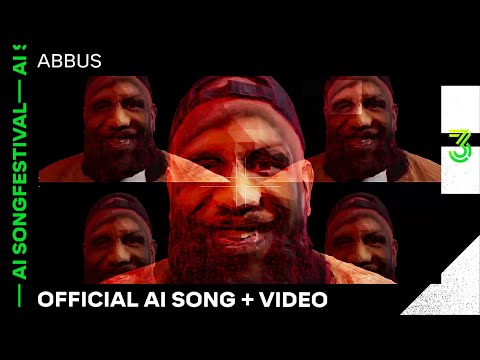

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('n1MQxhrNWXQ', width=900, height=500) # https://www.youtube.com/watch?v=n1MQxhrNWXQ

За этот курс вы освоили очень много важных тем и инструментов: базовые конструкции языка *Python*, библиотеки *pandas* и *numpy*, а также визуализацию данных, работу с файлами и медиа. Это самое начало пути.

Немного отвлечёмся и заглянем за горизонт: в видео выше звуковая дорожка и видеоряд были сгенерированы *AI*. Согласитесь, завораживает? Вот на что способны продвинутые алгоритмы! 

Давайте подведём черту и применим весь свой опыт и знания для решения заданий итогового проекта к курсу «Программирование на *Python*». Соберите все эти знания и все (оставшиеся) силы для решения итогового проекта курса! 

В нём мы не будем работать с огромным датафреймом или строить графики распределения случайных величин. Попробуем решить нетривиальную задачу: превратить женский голос в мужской и проверить миф о том, что в песнях Леонид Агутин — это на самом деле Анжелика Варум (или наоборот).

При выполнении задач этого проекта вы попрактикуетесь в исследовании данных и примените полученные знания на практике для преобразования звука.

## Задание 1

При обработке звука приходится много работать с массивами чисел. Поэтому вспомним для начала базовые конструкции.

Мы уже много раз сталкивались со случайными величинами в задачах этого курса. Вероятно, вы замечали, что такие величины могут быть очень «шумными»:

![](data/image06_01.png)

Очень сложно что-то разглядеть на таком графике из-за большого количества значений. Однако есть способ исправить ситуацию — можно вычислить **скользящее среднее** и таким образом очистить график от «шума».

Для каждых последовательных `N` чисел мы посчитаем среднее. Например, если `N = 10`, то результирующий массив будет содержать среднее элементов с первого по десятый, затем со второго по одиннадцатый и так далее. Такой диапазон чисел, для которых считается среднее, будет называться **размером окна**. Вот что получится для примера выше, если посчитать скользящее среднее с размером окна `N = 1000`:

![](data/image06_02.png)

Правда, более наглядно?

Входные данные: *python*-список `data` (данные) и число `window` (размер окна).

Результат: реализуйте функцию `sliding_average(data, window)`, возвращающую *python*-список размера `len(data)-N+1`, в котором записаны значения скользящего среднего.

- **Sample input:** `data=[1, 2, 3, 4, 5, 6, 7], N=2`
- **Sample output:** `[1.5, 2.5, 3.5, 4.5, 5.5, 6.5]`

In [3]:
def sliding_average(data, window):
    length = len(data) - window + 1
    result = []
    for i in range(length):
        sample = data[i:i+window]
        avg = sum(sample) / window
        result.append(avg)
    return result

In [4]:
sliding_average([1, 2, 3, 4, 5, 6, 7], 2)

[1.5, 2.5, 3.5, 4.5, 5.5, 6.5]

## Задание 2

Многие библиотеки для работы с данными возвращают их в формате *numpy*. Например, библиотека *soundfile* возвращает считанный звук в виде *numpy*-массива. Массив будет одномерным, если звук представлен в формате моно и двумерным, если в стерео. В этом задании вам потребуется посчитать корреляцию левого и правого каналов стерео звука. Так вы сможете определить, насколько разнообразны звуки в разных каналах.

Для того, чтобы посчитать коэффициент корреляции, можно использовать содержащуюся в библиотеке *numpy*-функцию `numpy.corrcoef`, которая принимает в качества аргумента два *numpy*-массива.

**Подсказка:** при встрече с незнакомой ранее функцией, не поленитесь заглянуть в документацию. В частности, вот [статья о функции `numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html#numpy.corrcoef) в официальной документации к библиотеке *numpy*.

Входные данные: двумерный массив `sound`, имеющий форму `[N, 2]` (*N* — длина записи).

Результат: напишите функцию `corr_channels(sound)`, возвращающую одно число — коэффициент корреляции левого и правого каналов данной записи.

- **Sample input:** `corr_channels(np.array([[0.9, 0.8], [-0.7, -0.4], [0.3, 0.9]]))`
- **Sample output:** 0.90069806

In [5]:
import numpy as np

In [6]:
def corr_channels(sound):
    l = sound[:, 0]
    r = sound[:, 1]
    coef = np.corrcoef(l, r)
    return coef[0][1]

In [7]:
corr_channels(np.array([[0.9, 0.8], [-0.7, -0.4], [0.3, 0.9]]))

0.9006980553277452

## Задание 3

При обработке звука иногда требуется отфильтровать некоторые частоты. Например, если дан спектр звука `signal` и число `threshold` — потребуется привести к нулю все значения частот, индексы которых выше `threshold` — определенного значения.

На практике это может понадобиться для фильтрации шумов или выделения голоса из звука.

![](data/image06_03.png)

`signal` имеет форму `(T, F)`, где `T` (*Time*) — это ось времени, а `F` (*Frequency*) — это ось частот. Это значит, что сигнал имеет фреймов (или временных отрезков). Например, на приведенном выше графике, `T`-фреймами являются промежутки `0-2, 2-4, 4-6, ...`  по оси *Time*. Каждый фрейм содержит описание спектра — набор коэффициентов для соответствующих частот.

Для решения этой задачи приведите к нулю коэффициенты частот с индексами выше `threshold`.

Входные данные: двумерный *numpy*-массив `signal`, число `threshold`.

Результат: напишите функцию `filter_freq(signal, threshold)`, обнуляющую частоты с индексами выше `threshold`.

- **Sample input:** `signal=[[1, 2, 1, 2, 1], [-1, 1, -3, 2, 3], [0, 1, 4, 2, 1]], threshold=2`
- **Sample output:** функция должна вернуть *numpy*-массив `[[1, 2, 1, 0, 0], [-1, 1, -3, 0, 0], [0, 1, 4, 0, 0]]`

In [8]:
def filter_freq(signal: np.array, threshold: int) -> np.array:
    signal[:, threshold + 1:] = 0
    return signal

In [9]:
filter_freq(np.array([
    [1, 2, 1, 2, 1],
    [-1, 1, -3, 2, 3],
    [0, 1, 4, 2, 1],
]), 2)

array([[ 1,  2,  1,  0,  0],
       [-1,  1, -3,  0,  0],
       [ 0,  1,  4,  0,  0]])

## НЕМНОГО ТЕОРИИ

Мы же напомним коротко о том, как всё устроено. Сигналу (в нашем случае звуку) можно сопоставить его спектр — это коэффициенты [преобразования Фурье](https://ru.wikipedia.org/wiki/Преобразование_Фурье) на небольших промежутках (мы будем брать промежутки по 50 мс). 

Для того, чтобы звук воспринимался ниже или выше, нужно «сместить» соответствующим образом коэффициенты разложения Фурье. Например, если мы хотим повысить звук в два раза (то есть перейти к следующей октаве), мы должны «переложить» значения из коэффициента 1 в коэффициент 2, из 2 в 4, из 3 в 6 и так далее. После того, как частоты поменяны, нам нужно выполнить **обратное преобразование Фурье** и получить снова тот же сигнал, но уже повышенный на октаву.

Для примера мы возьмём известную легенду о том, что исполнители Агутин и Варум поют друг за друга. В интернете можно найти множество материалов на эту тему, но мы хотим всё проверить сами. Мы подготовили для вас пример данных и код, выполняющий преобразование. Поэкспериментируйте с ним. Этот код вам потребуется для работы с заданиями №4 и №5.

```py
#!/usr/bin/python3
# coding: utf-8


import soundfile as sf                                  # импортируем библиотеку для работы с wav
import numpy as np
import scipy.fftpack                                    # библиотека для выполнения преобразования Фурье


def transform(x, mult):
    n = len(x)
    y = np.zeros([n], dtype=np.cdouble)
    for i in range(0, n // 2):
        k = int(i * mult)                               # k - откуда переставляем, i - куда
        if k >= n / 2:
            continue
        y[i] = x[k]                                     # переставляем частоты
        y[n - i - 1] = x[n - k - 1]
    return y


def process_frames(name, window):
    sig, samplerate = sf.read(name)                     # читаем файл в память в виде numpy-массива
    if len(sig.shape) == 2:
        sig = sig[:, 0]                                 # берём только один канал, если это стерео-звук
    step = int(samplerate * window)                     # переводим размер окна из миллисекунд в сигналы
    data, embeddings = [], []
    for i in range(0, sig.shape[0] - step, step):
        y = sig[i : i + step]
        y = scipy.fftpack.fft(y)                        # прямое преобразование Фурье
        embeddings.append(np.abs(y))                    # эти данные понадобятся для кластеризации/визуализации
        y = transform(y, 2**(4/12))                     # собственно смена частот
        y = scipy.fftpack.ifft(y)                       # обратное преобразование Фурье
        data += list(map(lambda x: x.real, y))
    sf.write('test.wav', data, samplerate)              # записываем звук в файл


def main():
    process_frames('data/agutin_varum.wav', 0.05)


if __name__ == "__main__":
    main()

```

In [10]:
import soundfile as sf
import scipy.fftpack

In [16]:
def transform(x, mult):
    n = len(x)
    y = np.zeros([n], dtype=np.cdouble)
    for i in range(0, n // 2):
        k = int(i * mult)                               # k - откуда переставляем, i - куда
        if k >= n / 2:
            continue
        y[i] = x[k]                                     # переставляем частоты
        y[n - i - 1] = x[n - k - 1]
    return y


def process_frames(name, window):
    sig, samplerate = sf.read(name)                     # читаем файл в память в виде numpy-массива
    if len(sig.shape) == 2:
        sig = sig[:, 0]                                 # берём только один канал, если это стерео-звук
    step = int(samplerate * window)                     # переводим размер окна из миллисекунд в сигналы
    data, embeddings = [], []
    for i in range(0, sig.shape[0] - step, step):
        y = sig[i : i + step]
        y = scipy.fftpack.fft(y)                        # прямое преобразование Фурье
        embeddings.append(np.abs(y))                    # эти данные понадобятся для кластеризации/визуализации
        y = transform(y, 2**(4/12))                     # собственно смена частот
        y = scipy.fftpack.ifft(y)                       # обратное преобразование Фурье
        data += list(map(lambda x: x.real, y))
    return data, samplerate
#     sf.write('test.wav', data, samplerate)              # записываем звук в файл

In [18]:
signal, samplerate = process_frames('data/agutin_varum.wav', 0.05)
sf.write('agutin_varum-modified.wav', signal, samplerate)

В этих преобразованиях есть некоторые тонкости.

Во-первых, они работают с **комплексными числами**. Если мы подаём на вход функциям вещественные числа, то на выходе мы получим комплексные коэффициенты, но они будут симметричны относительно середины. 

Философское объяснение этому факту следующее: `n` комплексных точек задаются числами `2 * n`, поэтому количество информации после преобразования Фурье должно быть тоже урезано в два раза. Однако этот факт можно доказать и прямыми вычислениями. Так или иначе, для нас это значит следующее: мы должны обрабатывать только половину спектра, а вторую половину просто симметрично отобразить.

Во-вторых, после обратного преобразования мы снова получим комплексные числа. Для того, чтобы перейти к действительным числам, нужно взять **вещественную часть**. Мы предоставим вам пример, как это можно сделать.

Теперь мы почти готовы к преобразованию голосов. Мы хотим понизить голос Анжелики Варум на 4 полутона. Один полутон — `2 ** 1/12`. Тогда полутона — это `2 ** 4/12`. Именно на эту величину нам и нужно сдвинуть частоты. Поэкспериментируйте и послушайте, что получается.



## Задание 4

В этой задаче от вас требуется отобразить заданный набор векторов в двумерное пространство, просто вызвав три строки кода, которые мы приводим ниже в условии задачи. Однако мы рекомендуем вам попробовать данный алгоритм на реальных данных и затем визуализировать результат. Код и звуковые данные возьмите из теоретического фрагмента, предваряющего эту задачу.

И еще немного теории про визуализацию многомерных данных. В обработке звука и в машинном обучении часто возникают ситуации, когда нужно визуализировать многомерные данные так, чтобы оставалась понятной их структура.

В случае со звуком это можно описать так: у вас есть множество точек, соответствующих спектрам в течение времени. Спектры имеют множество измерений, поэтому нам нужен способ для отображения их в двумерном пространстве. Более того, желательно их отобразить так, чтобы были видны кластера «похожих» спектров. Похожими они могут быть из-за того, что принадлежат одному и тому же человеку, обозначают один и тот же звук или же они сгенерированы одним и тем же музыкальным инструментом.

![](data/image06_04.png)

Для осуществления такого отображения можно применить алгоритм *TSNE*. Этот алгоритм подбирает такое отображение точек из многомерного пространства в двумерное, чтобы кластера близких точек оставались кластерами. Сейчас мы не будем вдаваться в детали (сделаем это в рамках дисциплины «Математика и алгоритмы для машинного обучения»), а просто применим функцию библиотеки *sklearn*, которая применит алгоритм *TSNE* к нашим данным.

Воспользуемся *python*-библиотекой `sklearn.manifold`. Для отображения точек из многомерного пространства в двумерное нужно подключить библиотеку и написать три строчки кода:

```py
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
projection = tsne.fit_transform(data)
```

Здесь `data` — это последовательность из `N` векторов размера `M`. Данные будут получены следующим образом: сигнал разбивается на промежутки по 50 мс и над каждым промежутком производится преобразование Фурье (то есть получается спектр сигнала на этом промежутке). Код выше отображает их в двумерные вектора (за это отвечает параметр `n_components=2`).

Приведём несколько примеров. Цвета точек на них зависят от близости к началу или к концу аудиодорожки — в начале дорожки они синие, а затем постепенно меняют цвет на красный. Мы назначали цвета по формуле `(i/count, 0, 1-i/count)`. Здесь `i` — номер фрейма, а `count` — количество фреймов. Вспомните, как устроена *RBG*-кодировка: в результате получается, что первый фрейм полностью синий, последний — полностью красный, а посередине цвета смешаны. Визуализируемые данные соответствуют спектрам на промежутках по 50 мс.

![](data/image06_05.png)

Здесь визуализирован [фрагмент интервью](https://drive.google.com/file/d/1S4LSFDvkK3rQ4S7ffYUyI92i1VksoofM/view?usp=sharing) с создателями Яндекса. Кластер справа внизу — это звуковая вставка между ответами на вопросы. Рекомендуем вам поисследовать, чему соответствуют другие кластеры. После отображения найдите координаты интересующего вас кластера и запишите в отдельный звуковой файл только те фреймы, которые соответствуют точкам кластера (просто отфильтруйте их по координатам).

Ниже приведён ещё один [пример](https://drive.google.com/file/d/1h47VSiqxCfIJWdWuqeqpuIa5Z_trNenW/view?usp=sharing). Он получен точно таким же образом, но из другой аудиозаписи; на нём так же отчётливо видны кластера. Более того, некоторые кластера явно разделены по цветам, что говорит о том, что соответствующие им звуки характерны для начала аудиозаписи (напомним, цвет меняется от синего в начале записи до красного в конце).

Для того, чтобы сдать это задание, вам достаточно вызвать преобразование *TSNE*. Но перед этим не забудьте поэкспериментировать с ним!

**Входные данные:** двумерный *numpy*-массив `data`, имеющий форму `(N, M)`.
**Результат:** напишите функцию `transform2d(data)`, возвращающую двумерный *numpy*-массив с данными, отображёнными в двумерное пространство, т. е., имеющий форму `(N, 2)`.

- **Sample input:** `data=np.array([[1, 2, 3], [2, 1, 3], [4, 5, 6], [5, 4, 6]])`
- **Sample output:** функция `transform2d(data)` должна вернуть `array([[ 269.5624 , -124.8034 ], [ 1.7829943, -295.07968 ], [ 220.81143 , -343.83212 ], [ 50.533993 , -76.050934 ]], dtype=float32)`

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
    
def transform2d(data):
    return tsne.fit_transform(data)    

In [20]:
transform2d(
    np.array([[1, 2, 3], [2, 1, 3], [4, 5, 6], [5, 4, 6]])
)

array([[ 269.5624   , -124.8034   ],
       [   1.7829943, -295.07968  ],
       [ 220.81143  , -343.83212  ],
       [  50.533993 ,  -76.050934 ]], dtype=float32)

## Задание 5

Итак, мы добрались до финального задания! Мы надеемся, что вы попрактиковались с преобразованиями голосов. Для того, чтобы подтвердить, что вы разобрались с кодом, измените его так, чтобы он возвращал индекс максимального из коэффициентов Фурье.

Для сдачи этого задания вам нужно будет написать функцию `max_freq_power(signal)`, определяющую наиболее сильную частоту (то есть ту, у которой наибольший модуль коэффициента Фурье) для каждого из промежутков размером 50 мс. На вход вашей функции будет передан сигнал `signal`, имеющий частоту дискретизации `samplerate=44100`. Вам нужно разбить его на промежутки в 50 мс, на каждом из них произвести преобразование Фурье, а затем выдать индекс максимального из коэффициентов на каждом из промежутков (не забывайте, что сигнал симметричный, рассматривайте только коэффициенты из первой половины).

**Входные данные:** одномерный *numpy*-массив `signal`, считайте, что частота дискретизации равна `samplerate=44100`.

**Результат:** напишите функцию `max_freq_power(signal)`, возвращающую *python*-список с максимальными коэффициентами Фурье на каждом из 50 мс промежутков.

- **Sample output:** `[15, 2, 13, 3, 5]`

In [14]:
import numpy as np
import scipy.fftpack

def max_freq_power(signal):
    step = int(44100 * 0.05)
    result = []
    for i in range(0, signal.shape[0] - step, step):
        y = signal[i : i + step]
        y = scipy.fftpack.fft(y)
        m = y[:y.shape[0] // 2]
        result.append(np.argmax(m))
    return result